## Data Aggregation

I will begin by ingesting some data from NYPD Motor Vehicle Collision Dataset into a pandas DataFrame. I will limit this with 100000 rows and only bring in the data related to Brooklyn.

In [1]:
import pandas as pd
datanyc = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=100000&borough=BROOKLYN")

In [2]:
datanyc.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-04-16T00:00:00.000,18:00,BROOKLYN,11230.0,40.624878,-73.964180,POINT (-73.96418 40.624878),EAST 12 STREET,AVENUE J,NaN,...,Passing Too Closely,NaN,NaN,NaN,4116873,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2019-03-25T00:00:00.000,19:25,BROOKLYN,11235.0,40.577477,-73.968285,POINT (-73.968285 40.577477),NaN,NaN,3000 OCEAN PARKWAY,...,NaN,NaN,NaN,NaN,4103230,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2,2019-04-06T00:00:00.000,22:00,BROOKLYN,11217.0,40.682510,-73.976326,POINT (-73.976326 40.68251),FLATBUSH AVENUE,5 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4110645,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
3,2019-03-27T00:00:00.000,14:30,BROOKLYN,11222.0,40.719010,-73.950190,POINT (-73.95019 40.71901),LORIMER STREET,BAYARD STREET,NaN,...,NaN,NaN,NaN,NaN,4106824,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,2019-04-05T00:00:00.000,16:53,BROOKLYN,11230.0,40.612330,-73.964790,POINT (-73.96479 40.61233),AVENUE O,EAST 9 STREET,NaN,...,NaN,NaN,NaN,NaN,4110715,Sedan,NaN,NaN,NaN,NaN


Let's take a look at the number of unique values for each variable in our dataset:

In [3]:
datanyc.nunique()

date                                906
time                               1439
borough                               1
zip_code                             39
latitude                          23391
longitude                         16606
location                          36627
on_street_name                     1473
off_street_name                    1888
cross_street_name                 28269
number_of_persons_injured            16
number_of_persons_killed              3
number_of_pedestrians_injured         7
number_of_pedestrians_killed          2
number_of_cyclist_injured             3
number_of_cyclist_killed              2
number_of_motorist_injured           16
number_of_motorist_killed             3
contributing_factor_vehicle_1        55
contributing_factor_vehicle_2        51
contributing_factor_vehicle_3        26
contributing_factor_vehicle_4         8
contributing_factor_vehicle_5         3
unique_key                       100000
vehicle_type_code1                  287


I want to begin by focusing on contributing_factor_vehicle_1. Even though it has many values, it can be more interesting to analyze it further. We have 54 kinds of contributing_factor_vehicle_1 values. Let's see the frequency of contributing_factor_vehicle_1 for Brooklyn.

In [4]:
contributing_vehicle_counts = datanyc.groupby(['borough', 'contributing_factor_vehicle_1']).size()
contributing_vehicle_counts.sort_values(ascending=False)

borough   contributing_factor_vehicle_1                        
BROOKLYN  Unspecified                                              29766
          Driver Inattention/Distraction                           22152
          Failure to Yield Right-of-Way                             7749
          Following Too Closely                                     6043
          Backing Unsafely                                          5305
          Passing Too Closely                                       5048
          Passing or Lane Usage Improper                            4105
          Other Vehicular                                           2380
          Turning Improperly                                        2225
          Traffic Control Disregarded                               1782
          Unsafe Lane Changing                                      1750
          Driver Inexperience                                       1629
          Unsafe Speed                                      

Driver Inattention/Distraction is the leading cause of collisions in Brooklyn. Let's see the percentages..

In [5]:
contributing_vehicle_pcts = contributing_vehicle_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).round(2)
contributing_vehicle_pcts.sort_values(ascending=False)

borough   contributing_factor_vehicle_1                        
BROOKLYN  Unspecified                                              29.89
          Driver Inattention/Distraction                           22.25
          Failure to Yield Right-of-Way                             7.78
          Following Too Closely                                     6.07
          Backing Unsafely                                          5.33
          Passing Too Closely                                       5.07
          Passing or Lane Usage Improper                            4.12
          Other Vehicular                                           2.39
          Turning Improperly                                        2.23
          Traffic Control Disregarded                               1.79
          Unsafe Lane Changing                                      1.76
          Driver Inexperience                                       1.64
          Unsafe Speed                                      

22% of the time driver inattention/distraction was the cause of a collision. At times when mindfulness meditation is the hip thing, it is ironic that people can't stay present at least while driving! One may assume 'unspecified' is also something similar... Can't be specified due to inattention. But then again, making assumptions is not healthy in this case hence I will not make any assumtptions.

Next, I want to create a new column only for hours because I want to see at what time total number of deaths rise.

In [6]:
datanyc['time'] = pd.to_datetime(datanyc.time)
datanyc['hour'] = datanyc['time'].dt.hour
datanyc.head(20)

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,hour
0,2019-04-16T00:00:00.000,2019-11-06 18:00:00,BROOKLYN,11230.0,40.624878,-73.964180,POINT (-73.96418 40.624878),EAST 12 STREET,AVENUE J,NaN,...,NaN,NaN,NaN,4116873,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,18
1,2019-03-25T00:00:00.000,2019-11-06 19:25:00,BROOKLYN,11235.0,40.577477,-73.968285,POINT (-73.968285 40.577477),NaN,NaN,3000 OCEAN PARKWAY,...,NaN,NaN,NaN,4103230,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,19
2,2019-04-06T00:00:00.000,2019-11-06 22:00:00,BROOKLYN,11217.0,40.682510,-73.976326,POINT (-73.976326 40.68251),FLATBUSH AVENUE,5 AVENUE,NaN,...,NaN,NaN,NaN,4110645,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,22
3,2019-03-27T00:00:00.000,2019-11-06 14:30:00,BROOKLYN,11222.0,40.719010,-73.950190,POINT (-73.95019 40.71901),LORIMER STREET,BAYARD STREET,NaN,...,NaN,NaN,NaN,4106824,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,14
4,2019-04-05T00:00:00.000,2019-11-06 16:53:00,BROOKLYN,11230.0,40.612330,-73.964790,POINT (-73.96479 40.61233),AVENUE O,EAST 9 STREET,NaN,...,NaN,NaN,NaN,4110715,Sedan,NaN,NaN,NaN,NaN,16
5,2019-04-10T00:00:00.000,2019-11-06 11:30:00,BROOKLYN,11220.0,40.642174,-74.020640,POINT (-74.02064 40.642174),60 STREET,3 AVENUE,NaN,...,NaN,NaN,NaN,4112215,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,11
6,2019-03-23T00:00:00.000,2019-11-06 12:28:00,BROOKLYN,11218.0,NaN,NaN,NaN,OCEAN PARKWAY,BEVERLEY ROAD,NaN,...,NaN,NaN,NaN,4102542,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,12
7,2019-04-03T00:00:00.000,2019-11-06 20:35:00,BROOKLYN,11218.0,40.643368,-73.969980,POINT (-73.96998 40.643368),NaN,NaN,571 CONEY ISLAND AVENUE,...,NaN,NaN,NaN,4108447,Sedan,Sedan,NaN,NaN,NaN,20
8,2019-03-25T00:00:00.000,2019-11-06 15:05:00,BROOKLYN,11210.0,40.618890,-73.945400,POINT (-73.9454 40.61889),NaN,NaN,2686 NOSTRAND AVENUE,...,NaN,NaN,NaN,4104125,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,15
9,2019-03-23T00:00:00.000,2019-11-06 13:30:00,BROOKLYN,11231.0,40.681910,-74.005040,POINT (-74.00504 40.68191),WOODHULL STREET,HAMILTON AVENUE,NaN,...,NaN,NaN,NaN,4103000,Sedan,Sedan,NaN,NaN,NaN,13


Let's see whether all look reasonable in the 'hour' column by checking the unique values.

In [7]:
datanyc['hour'].unique()

array([18, 19, 22, 14, 16, 11, 12, 20, 15, 13, 17, 21,  7,  9,  8,  6,  2,
       10,  4,  1,  0,  5, 23,  3], dtype=int64)

Looks good. While we are looking for the common hour for collisions, let's check the most common values for each column.

In [8]:
import statistics
pd.set_option('display.max_columns', None)
datanyc.mode(axis=0).head(1)

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,hour
0,2018-11-15T00:00:00.000,2019-11-06,BROOKLYN,11207.0,40.696033,-73.98453,POINT (-73.98453 40.696033),ATLANTIC AVENUE,ATLANTIC AVENUE,501 GATEWAY DRIVE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,116184,Sedan,Sedan,Sedan,PASSENGER VEHICLE,PASSENGER VEHICLE,16.0


16:00 is the hour in which most collisions occur! That is very interesting. And Sedan is the most common vehicle type involved in crashes. Because of the high number of unspecified values in the contributing factor vehicle columns, I was not able to learn a lot about them. Let's make a visualization to see the distribution of total number of deaths in Brooklyn by hour. 

In [9]:
grouped = datanyc.groupby(['hour'])
grouped.describe()

zip_code                                                                \
        count          mean        std      min      25%      50%       75%   
hour                                                                          
0      3426.0  11219.048453  12.176368  11201.0  11208.0  11217.0  11230.00   
1      1358.0  11219.118557  12.287513  11201.0  11208.0  11218.0  11230.00   
2       987.0  11219.302938  12.597708  11201.0  11208.0  11217.0  11232.00   
3       870.0  11219.070115  12.155813  11201.0  11208.0  11217.0  11230.00   
4       983.0  11218.680570  12.109047  11201.0  11208.0  11217.0  11229.00   
5      1090.0  11219.216514  12.583711  11201.0  11208.0  11218.0  11232.75   
6      1843.0  11219.125882  12.213776  11201.0  11208.0  11218.0  11230.00   
7      2959.0  11219.455221  11.842867  11201.0  11208.0  11218.0  11231.00   
8      5485.0  11219.573747  11.929692  11201.0  11209.0  11219.0  11230.00   
9      5443.0  11219.415580  12.010714  11201.0  11209.0  11219.0  11230.00   
10     5181.0  11219.267323  11.577944  11201.0  11209.0  11218.0  11230.00   
11     5500.0  11219.809636  11.975498  11201.0  11210.0  11219.0  11230.00   
12     5827.0  11220.015789  11.793775  11201.0  11210.0  11219.0  11230.00   
13     6079.0  11219.824807  11.803999  11201.0  11210.0  11219.0  11230.00   
14     7201.0  11219.791001  11.575696  11201.0  11210.0  11219.0  11230.00   
15     6804.0  11219.756761  11.909147  11201.0  11209.0  11219.0  11230.00   
16     7427.0  11219.607244  11.580113  11201.0  11209.0  11219.0  11230.00   
17     7327.0  11219.412993  12.055622  11201.0  11209.0  11218.0  11230.00   
18     6374.0  11219.642767  11.684927  11201.0  11209.0  11219.0  11230.00   
19     4936.0  11219.830632  11.817512  11201.0  11210.0  11219.0  11230.00   
20     4086.0  11219.575379  11.628293  11201.0  11209.0  11218.0  11230.00   
21     3474.0  11219.486759  11.903706  11201.0  11209.0  11218.0  11230.00   
22     3015.0  11219.332007  12.081572  11201.0  11208.0  11218.0  11230.00   
23     2324.0  11219.429862  12.108378  11201.0  11208.0  11218.0  11230.00   

              latitude                                                       \
          max    count       mean       std       min        25%        50%   
hour                                                                          
0     11249.0   3343.0  40.598154  1.571894   0.00000  40.634321  40.663400   
1     11249.0   1337.0  40.600269  1.572437   0.00000  40.636265  40.665627   
2     11249.0    966.0  40.537640  2.264018   0.00000  40.639482  40.668089   
3     11249.0    851.0  40.567541  1.970415   0.00000  40.639456  40.667625   
4     11249.0    960.0  40.578362  1.855346   0.00000  40.639371  40.667316   
5     11249.0   1057.0  40.468124  2.791437   0.00000  40.636710  40.662780   
6     11249.0   1798.0  40.569260  1.916489   0.00000  40.635494  40.662151   
7     11249.0   2888.0  40.658646  0.034036  40.57207  40.636441  40.662702   
8     11385.0   5351.0  40.632503  0.963089   0.00000  40.629908  40.656742   
9     11385.0   5345.0  40.579367  1.757387   0.00000  40.628770  40.656760   
10    11249.0   5093.0  40.631813  0.987175   0.00000  40.629900  40.657410   
11    11385.0   5401.0  40.579796  1.748283   0.00000  40.627180  40.655777   
12    11249.0   5706.0  40.611424  1.318252   0.00000  40.625566  40.655489   
13    11385.0   5951.0  40.605582  1.394067   0.00000  40.626556  40.653774   
14    11249.0   7049.0  40.613428  1.281092   0.00000  40.626770  40.654858   
15    11385.0   6689.0  40.641511  0.703858   0.00000  40.626770  40.655247   
16    11249.0   7278.0  40.632551  0.953581   0.00000  40.628650  40.656273   
17    11385.0   7196.0  40.643231  0.678638   0.00000  40.629398  40.655518   
18    11249.0   6259.0  40.640035  0.727501   0.00000  40.627217  40.653774   
19    11385.0   4846.0  40.636908  0.826569   0.00000  40.629230  40.654381   
20    11249.0   4027.0  40.633785  0.906569   0.00000 

In [10]:
grouped.number_of_persons_killed.count()

hour
0     3426
1     1358
2      987
3      870
4      983
5     1090
6     1843
7     2959
8     5485
9     5443
10    5182
11    5500
12    5827
13    6079
14    7201
15    6803
16    7427
17    7327
18    6374
19    4936
20    4086
21    3474
22    3015
23    2324
Name: number_of_persons_killed, dtype: int64

Once again we see that 16:00 is the time when the death toll rises. Let's visualize the hourly distribution.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

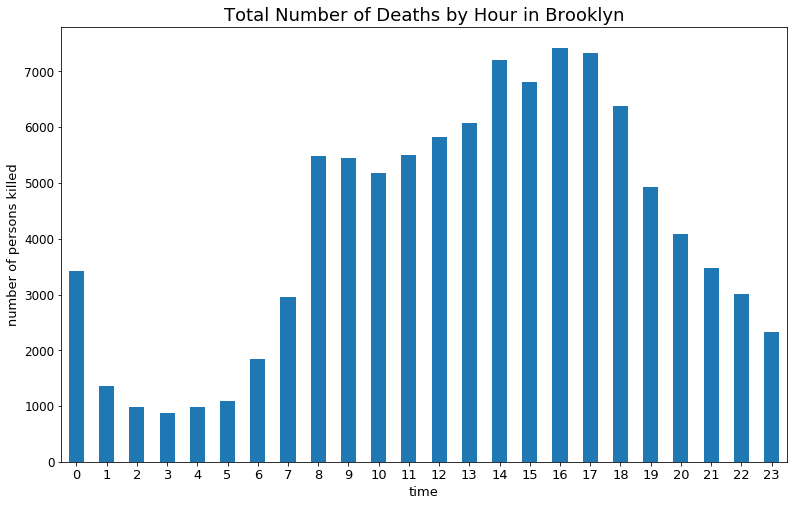

In [13]:
from matplotlib import pyplot as plt

grouped.number_of_persons_killed.count().plot(kind='bar', figsize=(13, 8))
plt.title('Total Number of Deaths by Hour in Brooklyn', fontsize=18)
plt.ylabel('number of persons killed', fontsize=13)
plt.xlabel('time', fontsize=13)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=12)

Hmm let's try a different style... maybe something more suitable for time series.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

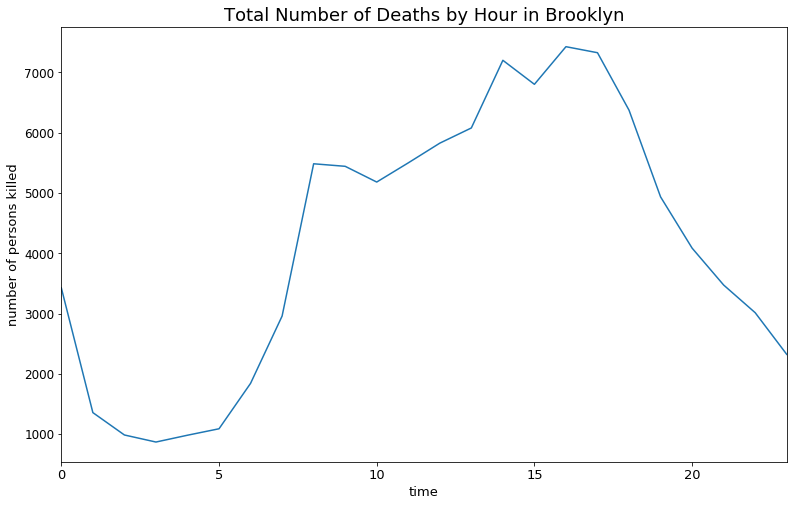

In [12]:
grouped.number_of_persons_killed.count().plot(figsize=(13, 8))
plt.title('Total Number of Deaths by Hour in Brooklyn', fontsize=18)
plt.ylabel('number of persons killed', fontsize=13)
plt.xlabel('time', fontsize=13)
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=12)

There is an increase in the number of deaths between 14:00 and 18:00 in Brooklyn. Interesting.

## Thank you for reading!